# Week4  授業前課題２　住宅価格予想

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


# 【問題1】練習のために特徴量の選択

データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [4]:
df = pd.read_csv("../train.csv")
df_se = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
df_se.head()                  

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


# 【問題2】線形回帰による推定と評価

データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [6]:
 df_se.dtypes

GrLivArea    int64
YearBuilt    int64
SalePrice    int64
dtype: object

In [7]:
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
SalePrice    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


In [8]:
df_se.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


((1095, 2), (365, 2))
((1095,), (365,))
MSE : 2314465092.732013


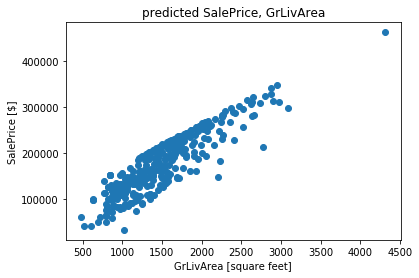

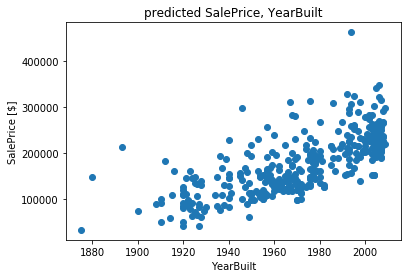

In [19]:
# sklearnのから各種モデルをimportする
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# データの前処理
# データを分割
X_train, X_test, y_train, y_test = train_test_split(df_se.iloc[:, :-1], df_se.loc[:, "SalePrice"], test_size=0.25, random_state=42)


print((X_train.shape, X_test.shape))
print((y_train.shape, y_test.shape))

# インスタンス作成から学習
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 推定
y_pred = linear_reg.predict(X_test)

# 平均二乗誤差（標準偏差、ばらつき、MSE）を求める
print("MSE : {}".format(mean_squared_error(y_test, y_pred)))

# 可視化?

plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"], y_pred)
plt.show()

In [18]:
print( y_train)

1023    191000
810     181000
1384    105000
626     139900
813     157900
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1095, dtype: int64


# 【問題3】手法の比較

以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

線形回帰
SVM
決定木
ランダムフォレスト

Linear Regression
MSE : 2314465092.732013


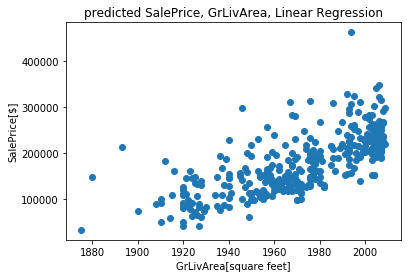

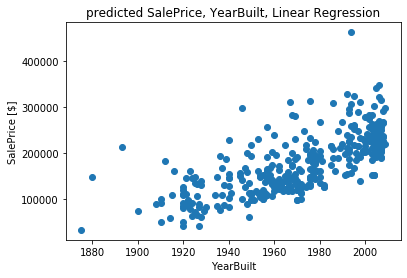

SVM
MSE : 7188819734.040301


/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


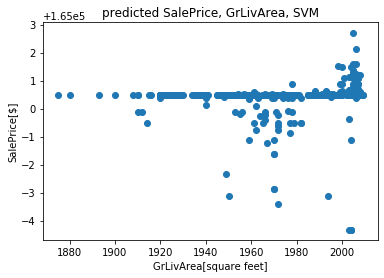

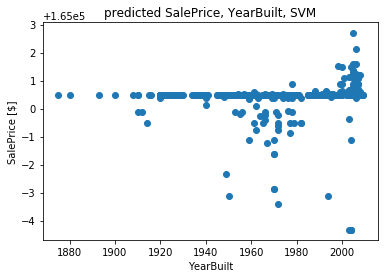

Decision Tree
MSE : 2341915908.471537


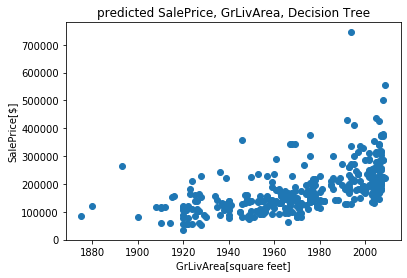

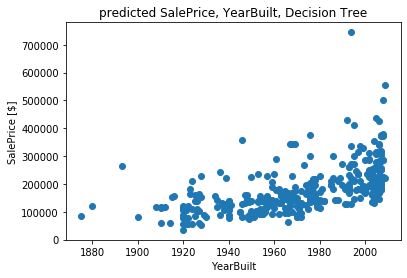

Random Forest
MSE : 1616640142.7116914


/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


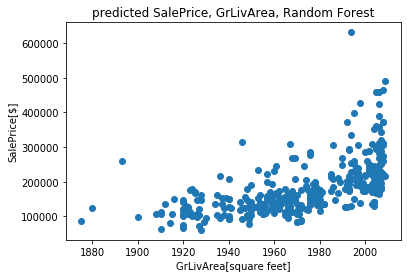

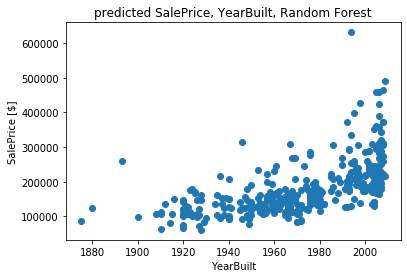

In [26]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#インスタンス化

linear_reg = LinearRegression()
svr = SVR()
tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

models = [linear_reg, svr, tree, random_forest]
model_names = ["Linear Regression", "SVM", "Decision Tree", "Random Forest"]
mse_list = []

for model,model_name in zip(models,model_names):
    print(model_name)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_list.append(mean_squared_error(y_test,y_pred))
    print("MSE : {}".format(mse_list[-1]))
    
    plt.title("predicted SalePrice, GrLivArea, {}".format(model_name))
    plt.xlabel('GrLivArea[square feet]')
    plt.ylabel('SalePrice[$]')
    plt.scatter(X_test['YearBuilt'],y_pred)
    plt.show()
    
    plt.title("predicted SalePrice, YearBuilt, {}".format(model_name))
    plt.xlabel("YearBuilt")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test["YearBuilt"], y_pred)
    plt.show()

In [27]:
metrics = pd.DataFrame([mse_list], columns=model_names)
display(metrics)

,Linear Regression,SVM,Decision Tree,Random Forest
0,2.314465e+09,7.188820e+09,2.341916e+09,1.616640e+09


In [ ]:
ランダムフォレストの精度が一番高く、SVMが一番低い。